# Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helper import *
%matplotlib inline

In [2]:
def plotFile(filename, i=None, numRows=None, numCols=None, maxElements=None, skip=1):
    data = np.array(readFromFile(filename))
    #
    #plt.figure()
    
    if i is not None and numRows is not None and numCols is not None: 
        plt.subplot(numRows, numCols, i + 1)
    else:
        plt.figure(figsize=(12, 9))
        
    if maxElements is not None:
        dataToPlot = data[:maxElements:skip]
    else:
        dataToPlot = data[::skip]
        
    plt.plot(np.arange(len(dataToPlot)), dataToPlot, )
    #plt.ylim([0, 200])
    return data

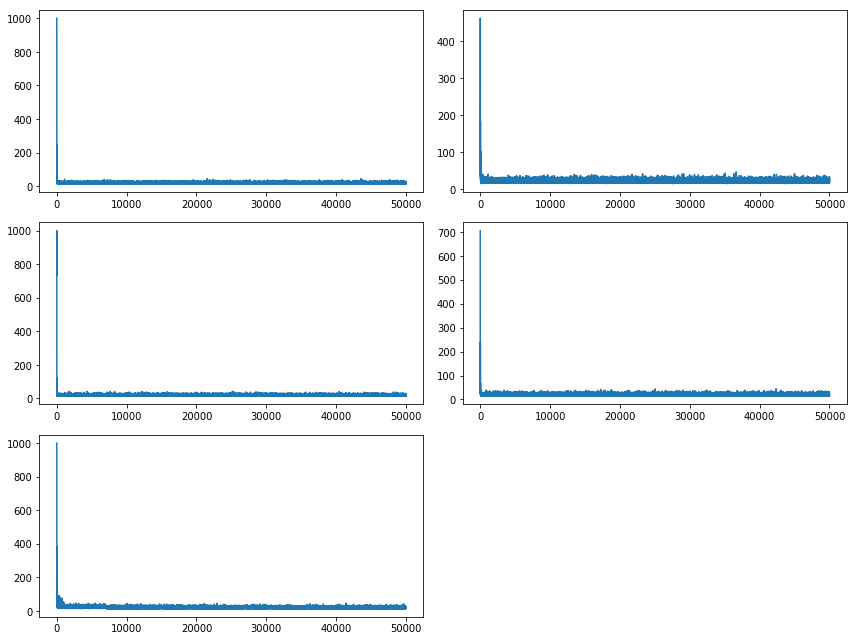

In [36]:
plt.figure(figsize=(12, 9))
numberOfSteps = plotFile("results/numberOfSteps_Q-Learning.json", 0, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_SARSA.json", 1, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_Actor-Critic.json", 2, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_QV-Learning.json", 3, 3, 2)
numberOfSteps = plotFile("results/numberOfSteps_ACLA.json", 4, 3, 2)
plt.tight_layout()

In [4]:
rewards = np.array(readFromFile("results/allRewardsIntakes_Q-Learning.json"))
len(rewards)
rewards[2499:-2500:2500].sum() / 20
91.1 / 20

4.555

In [5]:
numberOfSteps.min()

14.0

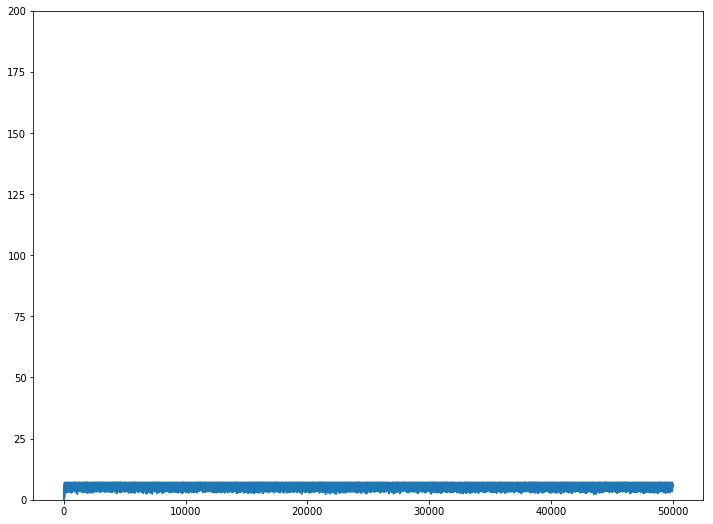

In [21]:
allRewardsIntakes = plotFile("results/allRewardsIntakes_Q-Learning.json")

# Experiment 1 

## Single Algorithms 

In [10]:
data = readComplexJson("resultsSingleAlgorithm.json")

In [11]:
algorithms = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA"]
finalRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}
cumulRes_single = {algo: {"mean": 0, "std": 0} for algo in algorithms}

res_single = {algo: {"final": 0, "cumul": 0} for algo in algorithms}

for algo in algorithms:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_single[algo]["mean"] = np.mean(final)
    finalRes_single[algo]["std"] = np.std(final)
    
    cumulRes_single[algo]["mean"] = np.mean(cumul)
    cumulRes_single[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_single, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_single, indent=3))

Final results
{
   "SARSA": {
      "mean": 4.838936771423959,
      "std": 0.17607735820859782
   },
   "Actor-Critic": {
      "mean": 4.855568944714282,
      "std": 0.12011959085812904
   },
   "QV-Learning": {
      "mean": 4.850565863019696,
      "std": 0.1326231753090119
   },
   "ACLA": {
      "mean": 4.747155608410631,
      "std": 0.4233245482025312
   },
   "Q-Learning": {
      "mean": 4.832716359683658,
      "std": 0.16949001236863268
   }
}
Cumul results
{
   "SARSA": {
      "mean": 97.27421329688295,
      "std": 6.04105292707039
   },
   "Actor-Critic": {
      "mean": 96.92020197128467,
      "std": 5.4681771095008544
   },
   "QV-Learning": {
      "mean": 97.12186157345828,
      "std": 5.476687961147747
   },
   "ACLA": {
      "mean": 90.99300749598687,
      "std": 10.603909191538563
   },
   "Q-Learning": {
      "mean": 96.99146889271204,
      "std": 5.862467573202897
   }
}


## Ensemble Methods 

In [12]:
data = readComplexJson("resultsEnsemble.json")

ensembles = ["Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]
finalRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}
cumulRes_ensembles = {algo: {"mean": 0, "std": 0} for algo in ensembles}

for algo in ensembles:
    final = [data[key][0] for key in data if key[0] == algo]
    cumul = [data[key][1] for key in data if key[0] == algo]
    
    finalRes_ensembles[algo]["mean"] = np.mean(final)
    finalRes_ensembles[algo]["std"] = np.std(final)
    
    cumulRes_ensembles[algo]["mean"] = np.mean(cumul)
    cumulRes_ensembles[algo]["std"] = np.std(cumul)
    
print("Final results")
print(json.dumps(finalRes_ensembles, indent=3))
print("Cumul results")
print(json.dumps(cumulRes_ensembles, indent=3))

Final results
{
   "Rank": {
      "mean": 4.845236812920206,
      "std": 0.08728829244051106
   },
   "Boltzmann Multiplication": {
      "mean": 4.260474036707816,
      "std": 0.6781960582705131
   },
   "Majority": {
      "mean": 4.810288611150387,
      "std": 0.16440224647780807
   },
   "Boltzmann Addition": {
      "mean": 4.844699580055157,
      "std": 0.034976304816175904
   }
}
Cumul results
{
   "Rank": {
      "mean": 95.9122758289203,
      "std": 5.196217995323917
   },
   "Boltzmann Multiplication": {
      "mean": 78.11573728949108,
      "std": 12.571040542952707
   },
   "Majority": {
      "mean": 93.41133910501512,
      "std": 6.034274720436644
   },
   "Boltzmann Addition": {
      "mean": 96.8367281526274,
      "std": 4.823815751765192
   }
}


([<matplotlib.axis.XTick at 0x7f22ebe8b5c0>,
 <a list of 9 Text xticklabel objects>)

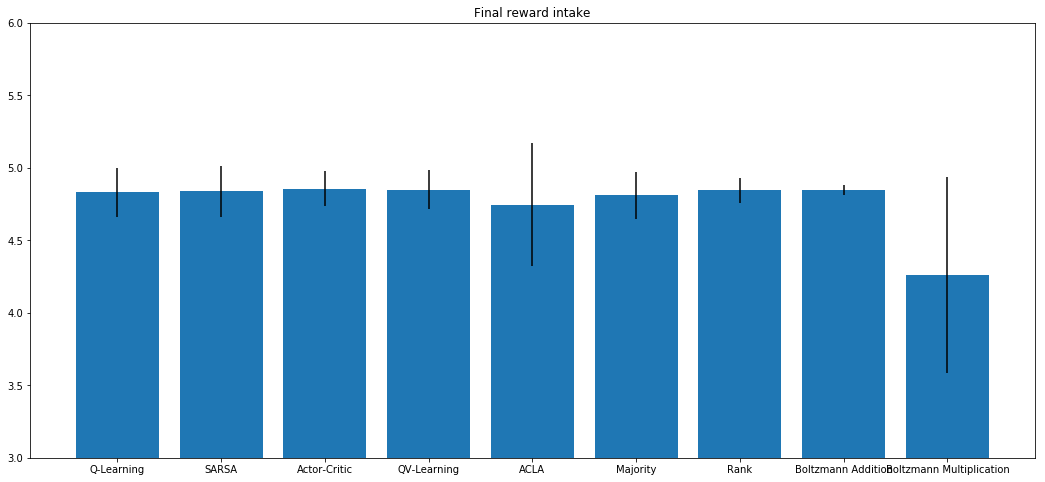

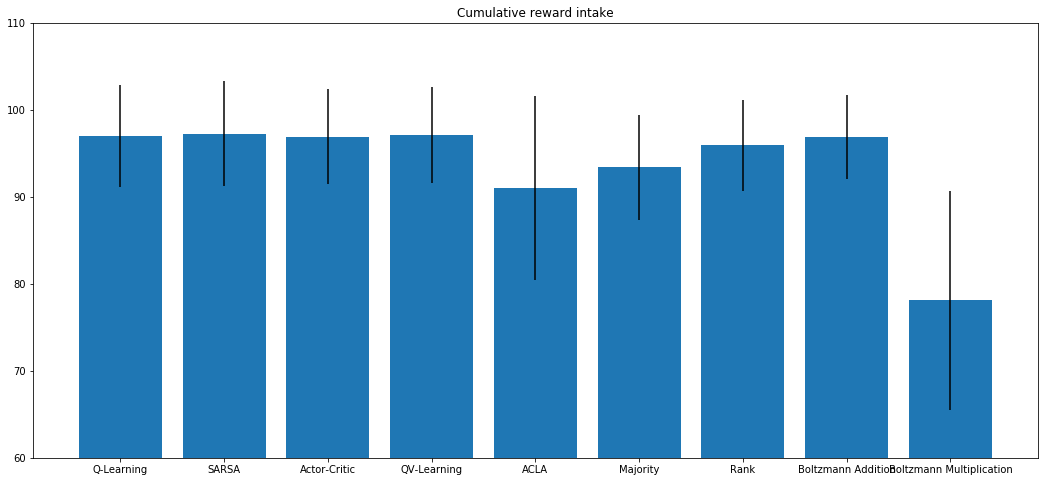

In [13]:
algos = algorithms + ensembles

all_res_final = dict(finalRes_single)
all_res_final.update(finalRes_ensembles)

res_final_mean = [all_res_final[algo]["mean"] for algo in algos]
res_final_std = [all_res_final[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Final reward intake")
plt.ylim(3,6)
plt.bar([i for i in range(len(algos))], res_final_mean, yerr=res_final_std)
plt.xticks([i for i in range(len(algos))],algos)

all_res_cumul = dict(cumulRes_single)
all_res_cumul.update(cumulRes_ensembles)

res_cumul_mean = [all_res_cumul[algo]["mean"] for algo in algos]
res_cumul_std = [all_res_cumul[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Cumulative reward intake")
plt.ylim(60, 110)
plt.bar([i for i in range(len(algos))], res_cumul_mean, yerr=res_cumul_std)
plt.xticks([i for i in range(len(algos))],algos)

## Neuronal

<Figure size 1600x900 with 0 Axes>

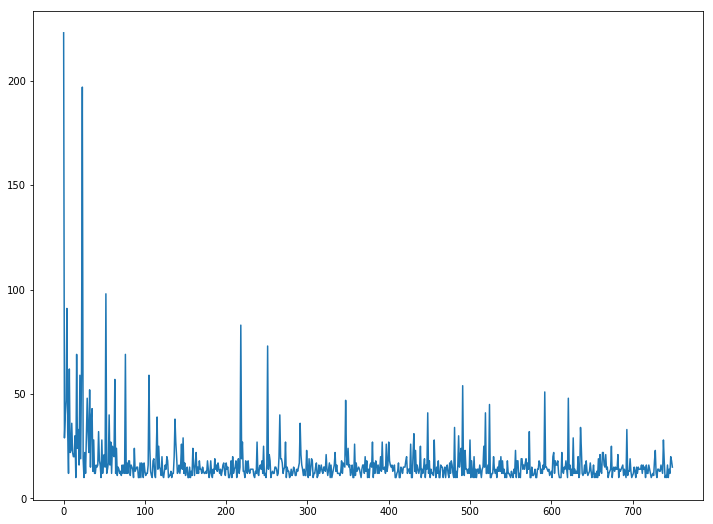

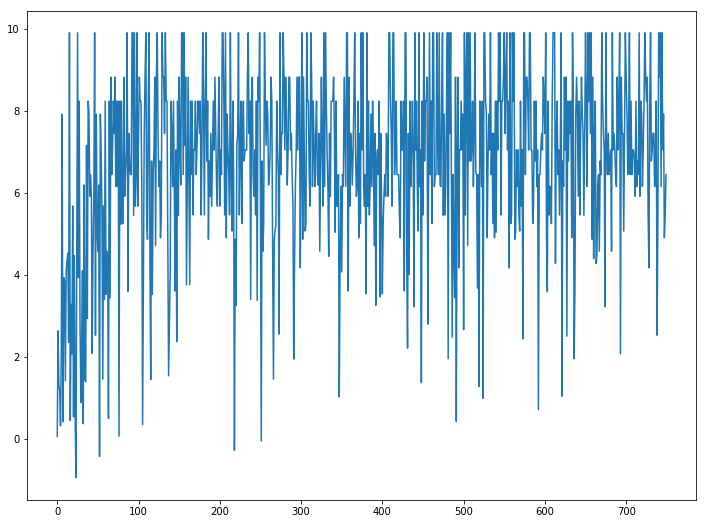

In [39]:
plt.figure(figsize=(16, 9))
numberOfSteps = plotFile("results/nnQLearning15Steps.json", maxElements=15000, skip=20)
numberOfSteps = plotFile("results/nnQLearning15Rewards.json", maxElements=15000, skip=20)

In [30]:
nnQ = np.array(readFromFile("results/nnQLearningRewards.json"))[:5000]

In [32]:
nnQ[-2500:].mean()

6.692036703340651

In [4]:
data = readComplexJson("runFiles/results/full-4.json")

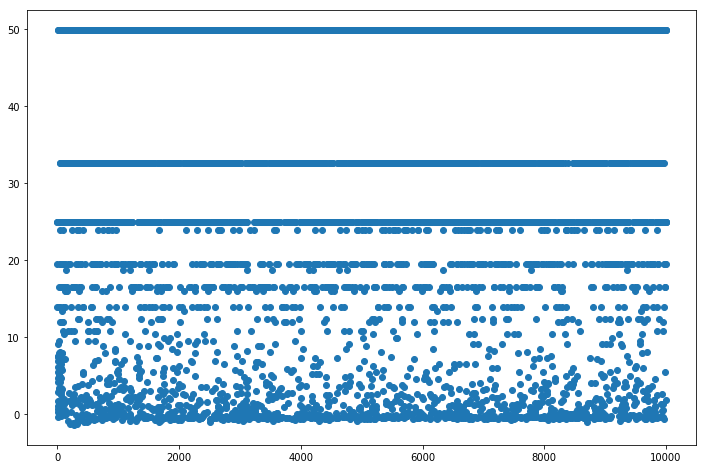

Q-Learning 8.306393763880457 9.028251912846347
SARSA 8.28126956066048 8.479365323781547
Actor-Critic 6.904452797550886 8.62917276150627
QV-Learning 10.183232126894584 10.139387035722272
ACLA 12.7446689774825 12.151109681321584
Majority 8.487599031853145 11.198726178744835
Rank 7.369226386533602 9.06934850878851
Boltzmann Addition 10.951161402554941 10.816527125613106
Boltzmann Multiplication 11.592498035918258 12.304384031936758


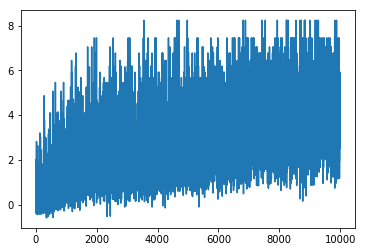

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(range(0, 10000), data["Boltzmann Multiplication", 1][0])
plt.show()
plt.plot(range(0, 10000), data["Q-Learning", 0][0])

for algo in ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA", "Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]:
    all_rewards = [data[algo, i][0][-50:] for i in range(50)]
    mean = np.mean(all_rewards)
    std = np.std(all_rewards)
    print(algo, mean, std)

In [16]:
with open("results/full-1.json") as f:
    a = f.readline()
    
    


In [17]:
b= json.loads(a)

In [19]:
del(a)

In [20]:
b=demap_keys(b)

In [38]:
algos = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA", "Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]

finalRes = {algo: {"mean": 0, "std": 0} for algo in algos}
cumulRes = {algo: {"mean": 0, "std": 0} for algo in algos}

for algo in algos:
    all_rewards = [np.mean(b[algo, i][0][-2500:]) for i in range(500)]
    cumulative = [np.sum(b[algo, i][0][2499::2500]) for i in range(500)]
    finalRes[algo]["mean"] = np.mean(all_rewards)
    finalRes[algo]["std"] = np.std(all_rewards)
    cumulRes[algo]["mean"] = np.mean(cumulative)
    cumulRes[algo]["std"] = np.std(cumulative) 
    
print("Cumulative rewards")
print(json.dumps(finalRes, indent=3))
print("Cumulative rewards")
print(json.dumps(cumulRes, indent=3))



Cumulative rewards
{
   "Q-Learning": {
      "mean": 4.846013628893006,
      "std": 0.1432092279605601
   },
   "SARSA": {
      "mean": 4.849515349490026,
      "std": 0.15164187058235132
   },
   "Actor-Critic": {
      "mean": 4.840225911712463,
      "std": 0.2780734181355506
   },
   "QV-Learning": {
      "mean": 4.855672406072319,
      "std": 0.1351348809167629
   },
   "ACLA": {
      "mean": 4.777965225776893,
      "std": 0.28790672649303806
   },
   "Majority": {
      "mean": 4.758001450181988,
      "std": 0.18409724351033802
   },
   "Rank": {
      "mean": 4.84803199970427,
      "std": 0.10291962854697502
   },
   "Boltzmann Addition": {
      "mean": 4.783793988863562,
      "std": 0.16834568485991447
   },
   "Boltzmann Multiplication": {
      "mean": 4.849062501001116,
      "std": 0.1665763550045159
   }
}
Cumulative rewards
{
   "Q-Learning": {
      "mean": 96.71732319013712,
      "std": 5.533887533438059
   },
   "SARSA": {
      "mean": 96.84720510996328,
 

([<matplotlib.axis.XTick at 0x117125cf8>,
 <a list of 9 Text xticklabel objects>)

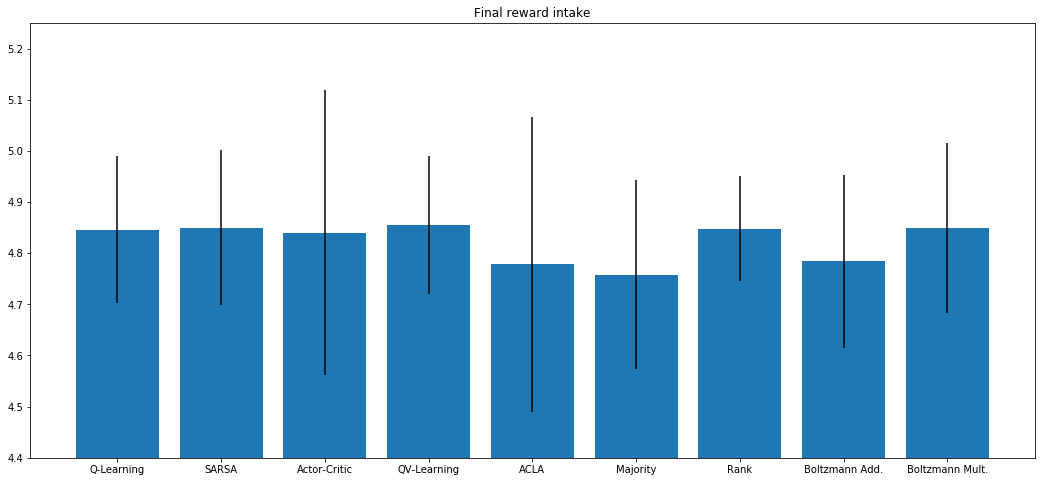

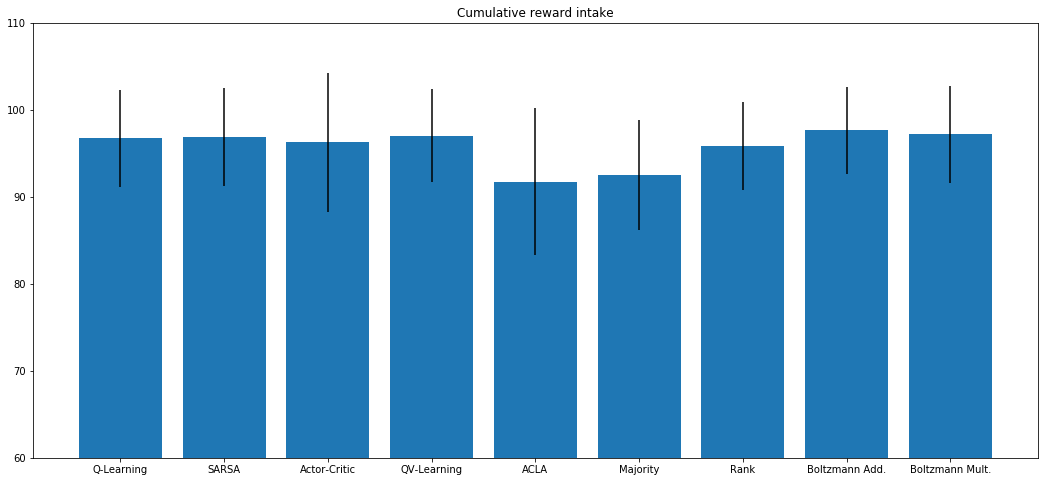

In [44]:
ticks = ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA", "Majority", "Rank", "Boltzmann Add.", "Boltzmann Mult."]



res_final_mean = [finalRes[algo]["mean"] for algo in algos]
res_final_std = [finalRes[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Final reward intake")
plt.ylim(4.4,5.25)
plt.bar([i for i in range(len(algos))], res_final_mean, yerr=res_final_std)
plt.xticks([i for i in range(len(algos))],ticks)


res_cumul_mean = [cumulRes[algo]["mean"] for algo in algos]
res_cumul_std = [cumulRes[algo]["std"] for algo in algos]

plt.figure(figsize=(18,8))
plt.title("Cumulative reward intake")
plt.ylim(60, 110)
plt.bar([i for i in range(len(algos))], res_cumul_mean, yerr=res_cumul_std)
plt.xticks([i for i in range(len(algos))],ticks)

In [4]:
data = readComplexJson("runFiles/results/full-4.json")

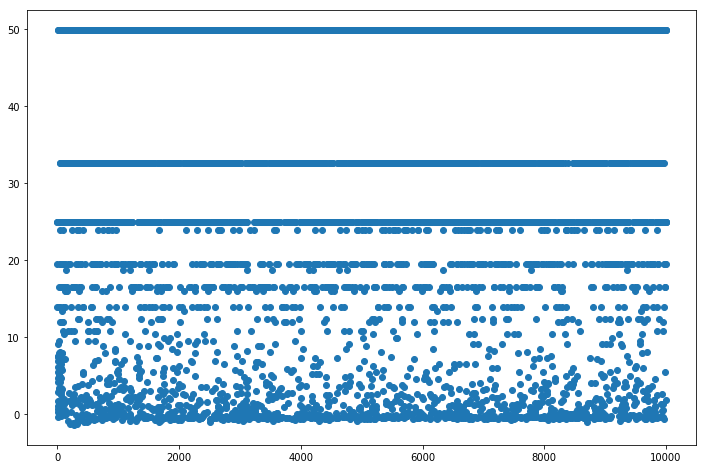

Q-Learning 8.306393763880457 9.028251912846347
SARSA 8.28126956066048 8.479365323781547
Actor-Critic 6.904452797550886 8.62917276150627
QV-Learning 10.183232126894584 10.139387035722272
ACLA 12.7446689774825 12.151109681321584
Majority 8.487599031853145 11.198726178744835
Rank 7.369226386533602 9.06934850878851
Boltzmann Addition 10.951161402554941 10.816527125613106
Boltzmann Multiplication 11.592498035918258 12.304384031936758


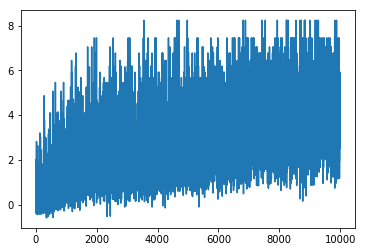

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(range(0, 10000), data["Boltzmann Multiplication", 1][0])
plt.show()
plt.plot(range(0, 10000), data["Q-Learning", 0][0])

for algo in ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA", "Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]:
    all_rewards = [data[algo, i][0][-50:] for i in range(50)]
    mean = np.mean(all_rewards)
    std = np.std(all_rewards)
    print(algo, mean, std)

# Experiment 5

In [3]:
data = readComplexJson("results/full-5.json")

In [4]:
data.shape

AttributeError: 'dict' object has no attribute 'shape'

In [13]:
data.keys()

dict_keys([('Q-Learning', 0), ('QV-Learning', 0), ('ACLA', 0), ('Boltzmann Multiplication', 0), ('Boltzmann Addition', 0), ('Majority', 0), ('Rank', 0), ('Actor-Critic', 0), ('SARSA', 0)])

In [15]:
len(data[('Q-Learning', 0)])

2

In [16]:
len(data[('Q-Learning', 0)][0])

2500

In [18]:
sum(data[('Q-Learning', 0)][1])

0.0

# Experiment  3

In [19]:
data = readComplexJson("runFiles/results/full-3-10trials.json")

In [29]:
print(len(data["Q-Learning", 1][0]))

500


In [31]:
for algo in ["Q-Learning", "SARSA", "Actor-Critic", "QV-Learning", "ACLA", "Majority", "Rank", "Boltzmann Addition", "Boltzmann Multiplication"]:
    all_rewards = [np.mean(data[algo, i][0][-500:]) for i in range(10)]
    mean = np.mean(all_rewards)
    std = np.std(all_rewards)
    print(algo, mean, std)

Q-Learning 6.627666816822426 0.6050369136203818
SARSA 6.50346288119665 0.6072072717371547
Actor-Critic 6.593428489787155 0.849030780531607
QV-Learning 6.284278387016369 0.6543789319495467
ACLA 5.316924901394286 2.079833423581435
Majority 5.588010207095153 2.7951165598895304
Rank 6.803213064318159 0.5147408153473322
Boltzmann Addition 5.570470521988513 1.8399045940714296
Boltzmann Multiplication 6.826464980735824 0.5400004597895347
